### Monty Hall Paradox

3 doors, behind one of them there is a car, behind the others a goat.\
A player chooses a door.\
The host of the game opens a door behind which there is a goat.\
A player decides to change his choice or not and the other does not.\
Which player is most likely to win the game?

In [461]:
import numpy as np
from scipy.stats import uniform
import matplotlib.pyplot as plt

In [ ]:
car_position = np.random.randint(0,3)

In [ ]:
configuration = [0,0,0]
configuration[car_position] = 1

In [464]:
def game(change):
    global configuration
    global gamer_first_choice
    if change==0:
        if gamer_first_choice == car_position:
            return 1 
        else:
            return 0
    elif change==1:
        host_choice = int(np.where(np.array(configuration) == 0)[0][np.random.randint(0,2)])
        if host_choice != gamer_first_choice:
            to_exclude  = {host_choice, gamer_first_choice}
            gamer_second_choice, = {0,1,2} - to_exclude
            print(gamer_second_choice,car_position)
            if gamer_second_choice == car_position:
                print('Won')

In [465]:
def game():
    no_change = 0
    change = 0
    global configuration
    global gamer_first_choice
    if gamer_first_choice == car_position:
        no_change = 1
    host_choice = np.where(np.array(configuration) == 0)[0][0]
    if host_choice == gamer_first_choice:
        host_choice = np.where(np.array(configuration) == 0)[0][1]
    if host_choice != gamer_first_choice:
        gamer_second_choice, = {0,1,2} - {host_choice, gamer_first_choice}
        if gamer_second_choice == car_position:
            change = 1
    return no_change, change

In [466]:
trials = np.arange(100,1e4,100, dtype=int)
results = np.zeros((len(trials), 2), dtype=float)  # Creates an Nx2 array with (0,0)

In [ ]:
for i,N in enumerate(trials):
    no_change_wins = 0
    change_wins = 0
    for n in range(N):
        gamer_first_choice  = np.random.randint(0,3)
        outcome             = game()
        no_change_wins      += outcome[0]
        change_wins         += outcome[1]
    results[i,0] = no_change_wins/N
    results[i,1] = change_wins/N

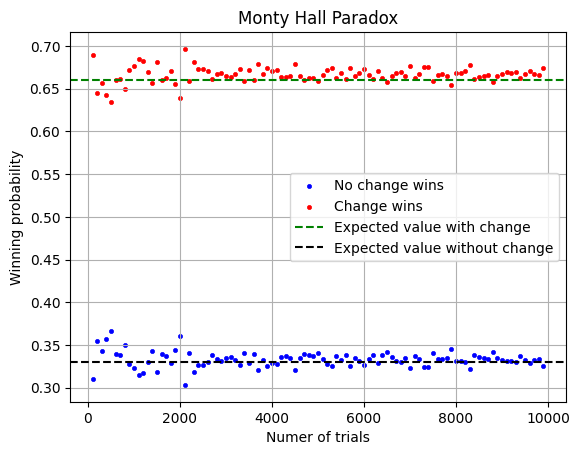

In [468]:
plt.scatter(trials, results[:,0], marker='.', color='blue', linewidth=0.5,label='No change wins')
plt.scatter(trials, results[:,1], marker='.', color='red', linewidth=0.5,label='Change wins')
plt.xlabel('Numer of trials')
plt.ylabel('Winning probability')
plt.title('Monty Hall Paradox')
plt.axhline(0.66, color='green', linestyle='--', label='Expected value with change')
plt.axhline(0.33, color='black', linestyle='--', label='Expected value without change')
plt.grid()
plt.legend()

Now let's try to generalize this to N doors.\
The host opens a number p less then N.

In [1128]:
def game_general(change,p):
    wins = 0
    global gamer_first_choice
    global car_position
    global initial_set
    host_set = initial_set - {car_position} - {gamer_first_choice}
    host_choises = np.random.choice(list(host_set), p)
    if change==True:
        gamer_second_choice_set = initial_set - set(host_choises) - {gamer_first_choice}
        gamer_second_choice = np.random.choice(list(gamer_second_choice_set), 1)
        if gamer_second_choice == car_position:
            wins = 1
    else:
        if gamer_first_choice == car_position:
            wins = 1
    return wins

In [1129]:
D = 3 # number of doors
P = 1  # number of doors opend by the host

In [1130]:
car_position = np.random.randint(0,D)
configuration = np.zeros(D, dtype=int)
configuration[car_position] = 1

In [ ]:
trials  = np.arange(100,1e4, 200)
results = np.zeros(len(trials))
change = True
for i,trial in enumerate(trials):
    wins    = 0
    for _ in range(int(trial)):
        gamer_first_choice = np.random.randint(D)
        wins += game_general(change,P) 
    results[i] = wins/trial

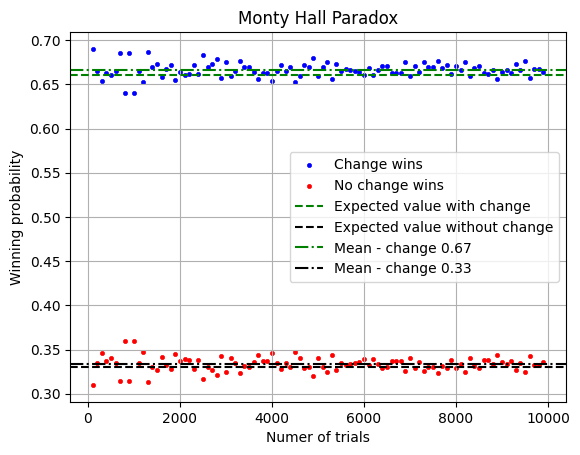

In [1133]:
plt.scatter(trials, results, marker='.', color='blue', linewidth=0.5,label='Change wins')
plt.scatter(trials, 1-results, marker='.', color='red', linewidth=0.5,label='No change wins')
plt.xlabel('Numer of trials')
plt.ylabel('Winning probability')
plt.title('Monty Hall Paradox')
plt.axhline(0.66, color='green', linestyle='--', label='Expected value with change')
plt.axhline(0.33, color='black', linestyle='--', label='Expected value without change')
plt.axhline(results.mean(), color='green', linestyle='-.', label=f'Mean - change {results.mean():.2}')
plt.axhline((1-results).mean(), color='black', linestyle='-.', label=f'Mean - change {(1-results).mean():.2}')
plt.grid()
plt.legend()

In [1201]:
N = [3,5,8]
P = np.arange(min(N)-2, max(N)-1,1)

In [1207]:
trials  = np.arange(100,1e4, 500)
matrix = np.empty((len(N), len(P), len(trials)))
for i, n in enumerate(N):
    car_position = np.random.randint(n)
    configuration = np.zeros(n)
    configuration[car_position] = 1
    for j, p in enumerate(P):
        if p == n-2:
            results = []
            for k, trial in enumerate(trials):
                wins = 0
                for _ in range(int(trial)):
                    gamer_first_choice = np.random.randint(n)
                    initial_set = set(range(n))
                    temp = game_general(True, p)
                    wins += temp
                results.append(wins / trial)
            matrix[i,j] = results  # Store full results array
        else:
            matrix[i,j] = np.zeros(len(trials))


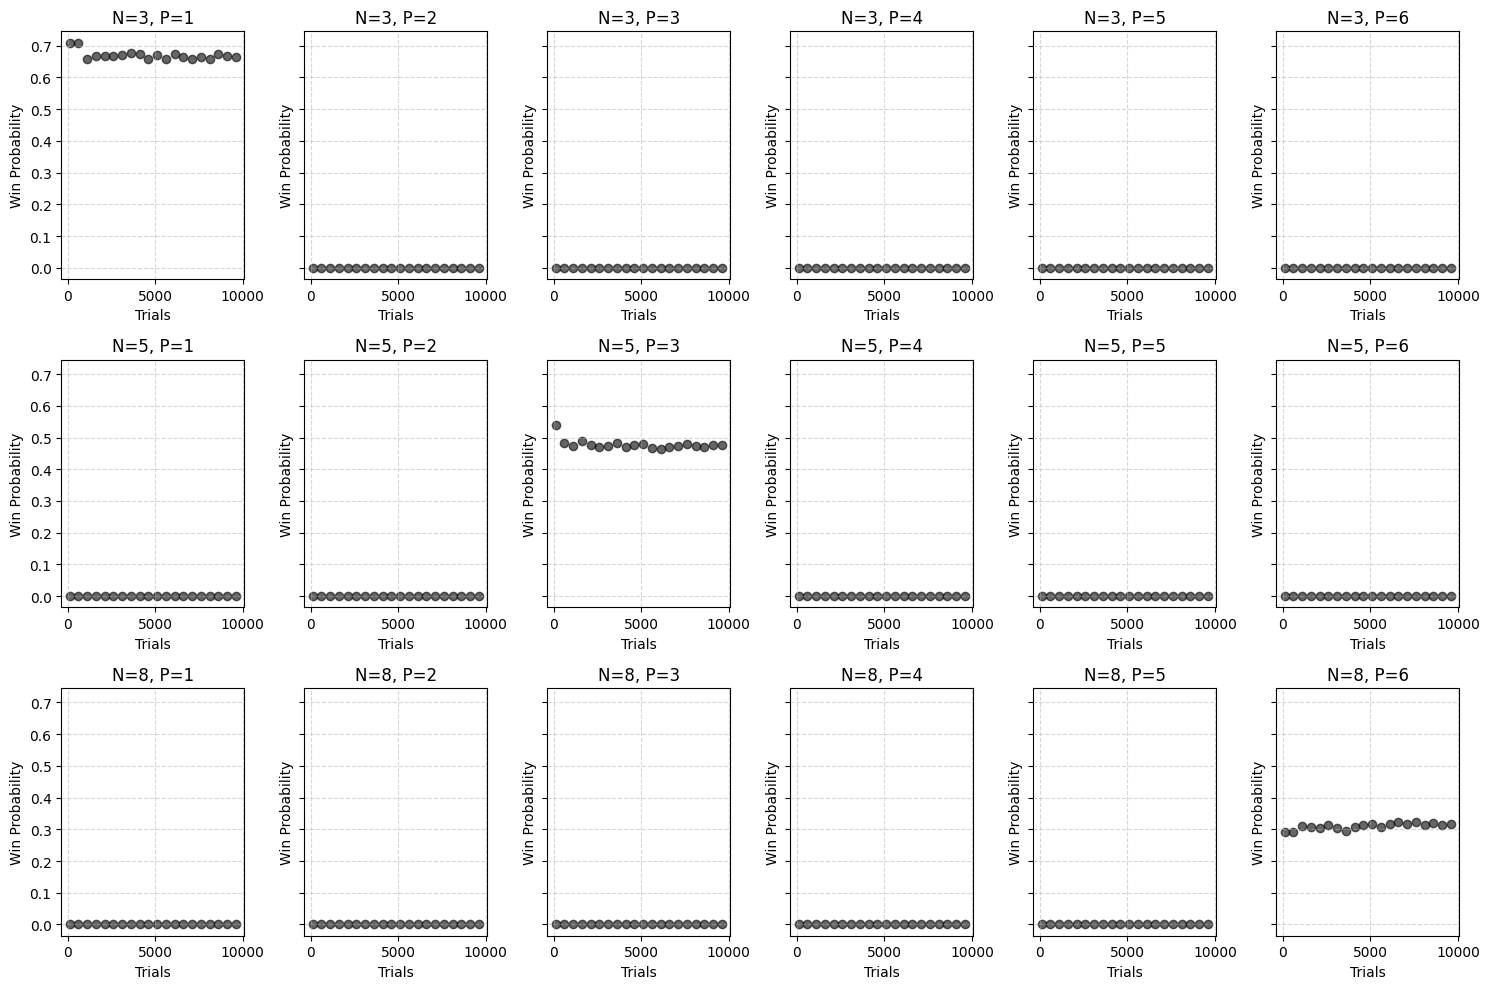

In [1208]:
fig, axes = plt.subplots(len(N), len(P), figsize=(15,10), sharex=False, sharey=True)

# Ensure axes is a 2D array even when there's only one subplot
if not isinstance(axes, np.ndarray):
    axes = np.array([[axes]])


for i, n in enumerate(N):
    for j, p in enumerate(P):
        ax = axes[i, j]  # Correct way to index 2D axes
        ax.scatter(trials, matrix[i, j], color='black', alpha=0.6)
        ax.set_title(f"N={n}, P={p}")
        ax.set_xlabel("Trials")
        ax.set_ylabel("Win Probability")
        ax.grid(True, linestyle="--", alpha=0.5)

plt.tight_layout()
